In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os.path
import operator
import folium
from datetime import datetime
%matplotlib notebook

In [2]:
pollution = pd.read_csv(os.path.join('data', 'pollution_data.csv'))
pollution.head()

,Unnamed: 0,latitude,longitude,magnitude,measurement,station,technique,units,when
0,0,40.421949,-3.692569,SO2,16.31,P. Recoletos,UV Fluorescence,µg/m3,2001-01-03
1,1,40.421949,-3.692569,SO2,17.04,P. Recoletos,UV Fluorescence,µg/m3,2001-01-04
2,2,40.421949,-3.692569,SO2,15.84,P. Recoletos,UV Fluorescence,µg/m3,2001-01-05
3,3,40.421949,-3.692569,SO2,15.49,P. Recoletos,UV Fluorescence,µg/m3,2001-01-06
4,4,40.421949,-3.692569,SO2,18.65,P. Recoletos,UV Fluorescence,µg/m3,2001-01-07


In [3]:
proper_dates = pd.to_datetime(pollution.when.values)
index = pd.MultiIndex.from_tuples(list(zip(proper_dates.year, proper_dates.month, proper_dates.day)),
                                 names=['Year', 'Month','Day'])

In [4]:
quantitative = pd.DataFrame(
    {'station': pollution.station.values,
     'magnitude': pollution.magnitude.values,
     'measurement': pollution.measurement.values,
     'longitude': pollution.longitude.values,
     'latitude': pollution.latitude.values},
    index=index
)
quantitative.head()

latitude  longitude magnitude  measurement       station
Year Month Day                                                           
2001 1     3    40.421949  -3.692569       SO2        16.31  P. Recoletos
           4    40.421949  -3.692569       SO2        17.04  P. Recoletos
           5    40.421949  -3.692569       SO2        15.84  P. Recoletos
           6    40.421949  -3.692569       SO2        15.49  P. Recoletos
           7    40.421949  -3.692569       SO2        18.65  P. Recoletos

Something happened processing year 2002


<IPython.core.display.Javascript object>


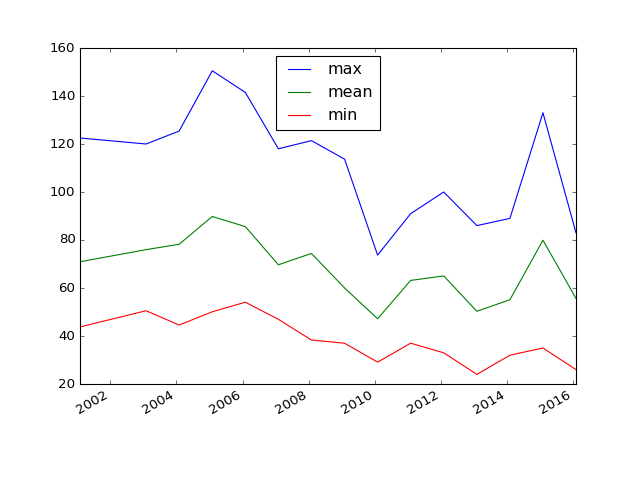

In [9]:
filtered = quantitative[(quantitative.station == 'Escuelas Aguirre') & (quantitative.magnitude == 'NO2')]

years = []
mean = []
maximum = []
minimum = []
for year in set(filtered.index.get_level_values('Year')):
    try:
        mean.append(filtered.loc[year, 1].measurement.mean())
        maximum.append(filtered.loc[year, 1].measurement.max())
        minimum.append(filtered.loc[year, 1].measurement.min())
        years.append(datetime(year, 1, 31))
    except TypeError as e:
        print('Something happened processing year {}'.format(year))
    
pd.DataFrame({'mean': mean,
              'max': maximum,
              'min': minimum}, index=years).plot()



In [6]:
map_2 = folium.Map(location=[40.4159381,-3.7025817],
                   tiles='Stamen Toner',
                   zoom_start=12)

at2001 = quantitative.loc[2001]

for key, group in at2001.groupby('station'):
    if not np.isnan(group.iloc[0].longitude):
        folium.CircleMarker(location=[group.iloc[0].latitude,group.iloc[0].longitude], radius=200,
                            popup=key, color='#ffffff',
                            fill_color='#3186cc').add_to(map_2)
        
at2016 = quantitative.loc[2016]

for key, group in at2016.groupby('station'):
    if not np.isnan(group.iloc[0].longitude):
        folium.CircleMarker(location=[group.iloc[0].latitude,group.iloc[0].longitude], radius=200,
                            popup=key, color='#3186cc',
                            fill_color='#ffffff').add_to(map_2)

map_2